## Исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.


##### <a href='#section1'>1. Изучение общей информации.</a>

##### <a href='#section2'>2. Предобработка данных.</a>

##### <a href='#section5'>3. Проведение расчетов и добавление новых столбцов в таблицу.</a>

##### <a href='#section6'>4. Исследовательский анализ данных.</a>

##### <a href='#section7'>5. Общий вывод.</a>

### <a id='section1'>1. Изучение общей информации</a>

In [353]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))
df.head()

False


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [354]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

При первичном изучении данных мы видим отсутствие значений во многих столбцах, некорректные типы данных, нелогичное расположение столбцов, а также верхний регистр в названии одного из них. Все это мы исправим в предобработке данных.

### <a id='section2'>2. Предобработка данных</a>

In [356]:
#переставим столбцы местами чтобы их расположение стало более логично
df = df[[
 'locality_name',  
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'is_apartment',
 'studio',
 'open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'cityCenters_nearest',
 'airports_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest'
]]

In [357]:
#переименуем некоторые столбцы для удобства восприятия
colum= [
 'locality_name',  
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'is_apartment',
 'studio',
 'open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'citycenter_m',
 'airports_m',
 'parks_3km',
 'parks_nearest_m',
 'ponds_3km',
 'ponds_nearest_m'
]
df.set_axis(colum, axis='columns', inplace=True)

In [358]:
#посмотрим на долю пропущенных значений
print(df.isna().mean())

locality_name           0.002068
total_area              0.000000
living_area             0.080299
kitchen_area            0.096122
ceiling_height          0.387991
rooms                   0.000000
balcony                 0.486054
floor                   0.000000
floors_total            0.003629
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
total_images            0.000000
last_price              0.000000
first_day_exposition    0.000000
days_exposition         0.134225
citycenter_m            0.232879
airports_m              0.233850
parks_3km               0.232837
parks_nearest_m         0.659100
ponds_3km               0.232837
ponds_nearest_m         0.615596
dtype: float64


In [359]:
#прежде всего заполним нулевыми значениями пропуски в столбце балконы
df.loc[df['balcony'].isnull(), 'balcony'] = 0

In [360]:
print(df['rooms'].value_counts())
print(df['is_apartment'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64
False    2725
True       50
Name: is_apartment, dtype: int64


In [361]:
#удаляем строки, где количество комнат указано как 0, так как их количество менее 1%
df.drop(df[df['rooms'] == 0].index, inplace=True)

# также поступим с квартирами где не указана этажность
df.drop(df[df['floors_total'].isnull()].index, inplace=True)

In [362]:
#заодно проверим гипотезу, что квартиры с 0 комнат могли быть апартаментами
print(df['is_apartment'].value_counts())

False    2719
True       50
Name: is_apartment, dtype: int64


In [363]:
#количество аппартаментов не изменилось, значит их не затронуло удаление

In [364]:
df['locality_name'].isna().sum()

48

In [365]:
# удаляем строки без указания населенного пункта ибо они бесполезны для анализа
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

In [366]:
# теперь разберемся со студиями
df['is_apartment'].unique()


array([nan, False, True], dtype=object)

In [367]:
# заменим NAN значения на False
df['is_apartment'] = df['is_apartment'].fillna(0)

In [368]:
# изменим тип данных столбца с первым днем публикации
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [369]:
for rooms in df['rooms'].unique():
    #заполняем пропуски общей площади
    df.loc[(df['total_area'].isna()) & (df['rooms'] == rooms), 'total_area'] = \
    df[df['rooms'] == rooms]['total_area'].median()
    #заполняем пропуски в площади кухни
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == rooms), 'kitchen_area'] = \
    df[df['rooms'] == rooms]['kitchen_area'].median()

#заполняем пропуски в жилой площади(принял нежилую площадь как 2 площади кухни: кухня+коридор+ванна\туалет)
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area'] - \
                                                        2* df.loc[df['living_area'].isna(), 'kitchen_area']
    
print('Средняя площадь кухни', df['kitchen_area'].median())
print('Средняя жилая площадь', df['living_area'].median())
print('Средняя общая площадь', df['total_area'].median())

Средняя площадь кухни 9.0
Средняя жилая площадь 30.2
Средняя общая площадь 52.0


In [370]:
# как видим значения получаются довольно правдоподобными

In [371]:
#устраняем оставшиеся пропуски в других столбцах
#дни экспозиции
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].describe()[5]
#аэропорты, парки и пруды
for location in df['locality_name'].unique():
    df.loc[(df['locality_name'] == location) & (df['airports_m'].isna()),'airports_m' ] \
                        =  df.loc[df['locality_name'] == location, 'airports_m'].mean()
    
    df.loc[(df['locality_name'] == location) & (df['parks_3km'].isna()),'parks_3km' ] \
                        =  df.loc[df['locality_name'] == location, 'parks_3km'].mean()
    
    df.loc[(df['locality_name'] == location) & (df['ponds_3km'].isna()),'ponds_3km' ] \
                        =  df.loc[df['locality_name'] == location, 'ponds_3km'].mean()
    

In [372]:
#Проверим удалось ли заменить пропуски    
print(df.isna().mean())

locality_name           0.000000
total_area              0.000000
living_area             0.000000
kitchen_area            0.000000
ceiling_height          0.383895
rooms                   0.000000
balcony                 0.000000
floor                   0.000000
floors_total            0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
total_images            0.000000
last_price              0.000000
first_day_exposition    0.000000
days_exposition         0.000000
citycenter_m            0.232082
airports_m              0.229173
parks_3km               0.229173
parks_nearest_m         0.657610
ponds_3km               0.229173
ponds_nearest_m         0.616277
dtype: float64


In [373]:
#заменим тип float на int в столбцах где используются целоичсленный значения
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

In [374]:
#окончательный вид данных после предобработки
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23371 non-null object
total_area              23371 non-null float64
living_area             23371 non-null float64
kitchen_area            23371 non-null float64
ceiling_height          14399 non-null float64
rooms                   23371 non-null int64
balcony                 23371 non-null int64
floor                   23371 non-null int64
floors_total            23371 non-null int64
is_apartment            23371 non-null object
studio                  23371 non-null bool
open_plan               23371 non-null bool
total_images            23371 non-null int64
last_price              23371 non-null int64
first_day_exposition    23371 non-null datetime64[ns]
days_exposition         23371 non-null int64
citycenter_m            17947 non-null float64
airports_m              18015 non-null float64
parks_3km               18015 non-null float64
parks_nearest

### Вывод:

В процессе предобработки данных навели порядок в названиях столбцов, заменили строковый формат на дату, убрали строки с пустыми значения, которые не повлияют на дальнешие расчеты. Проценные значения в значениях площади заменили медианными. Теперь производить анализ станет легче и результаты будут точнее.

### <a href='#section5'>3. Проведение расчетов и добавление новых столбцов в таблицу</a>

In [375]:
df['price_meter'] = df['last_price'] / df['total_area']
df['price_meter'] = df['price_meter'].round(decimals=2)

In [376]:
#расчитаем и добавим в таблицу день недели, месяц и год публикации объявления
df['number_day'], df['month'], df['year']  = df['first_day_exposition'].dt.weekday, df['first_day_exposition'].dt.month,\
                                                                                   df['first_day_exposition'].dt.year

In [377]:
#расчитаем и добавим в таблицу этаж квартиры; варианты — первый, последний, другой
def new_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'нет информации'
df['new_floor'] = df.apply(new_floor, axis = 1)  
df['new_floor'].value_counts()

другой       17161
последний     3319
первый        2891
Name: new_floor, dtype: int64

In [378]:
#расчитаем и добавим в таблицу: соотношение жилой и общей площади и  также отношение площади кухни к общей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [379]:
df.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,...,parks_nearest_m,ponds_3km,ponds_nearest_m,price_meter,number_day,month,year,new_floor,living_area_ratio,kitchen_area_ratio
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16,0,...,482.0,2.0,755.0,120370.37,3,3,2019,другой,0.472222,0.231481
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2,1,11,0,...,NaN,0.0,NaN,82920.79,1,12,2018,первый,0.460396,0.272277
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0,4,5,0,...,90.0,2.0,574.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,Санкт-Петербург,159.0,140.0,9.5,NaN,3,0,9,14,0,...,84.0,3.0,234.0,408176.10,4,7,2015,другой,0.880503,0.059748
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0,13,14,0,...,112.0,1.0,48.0,100000.00,1,6,2018,другой,0.320000,0.410000


### Вывод:

Теперь когда мы добавили все необходимые для работы столбцы можно приступать к анализу данных 

### <a href='section6'>4. Исследовательский анализ данных</a>

In [380]:
#изучим основные параметры квартир: площадь, цена, число комнат, высота потолков
#но для начала уберем редкие и выбивающиеся значения

In [381]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23371.000000,2.337100e+04,23371.000000,14399.000000,23371.000000
mean,60.580161,6.566584e+06,2.087844,2.769387,169.836721
std,35.613640,1.094248e+07,1.066362,1.249022,206.758741
min,12.000000,1.219000e+04,1.000000,1.000000,1.000000
25%,40.200000,3.450000e+06,1.000000,2.510000,45.000000
50%,52.000000,4.650000e+06,2.000000,2.650000,96.000000
75%,70.000000,6.800000e+06,3.000000,2.800000,199.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


На данном этапе необходимо избавиться от выбросов. Создадим функцию, определяющую границы "усов" для задаваемого признака.

In [382]:
def det_whiskers(column):
    stat = df[column].describe()
    
    # межквартильный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

In [383]:
det_whiskers('total_area')

[12.0, 114.7]

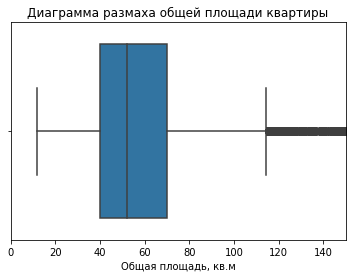

In [384]:
# построим диаграмму размаха, ограничив площадь 150 кв.м
sns.boxplot(df['total_area'])
plt.title('Диаграмма размаха общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

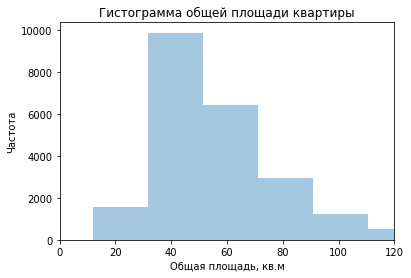

In [385]:
# Построим диаграмму для объектов с площадью менее 120 кв.м.
sns.distplot(df['total_area'], kde=False, bins=45)
plt.xlim(0, 120)
plt.title('Гистограмма общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

In [386]:
#зададим функцию, вычисляющую долю аномальных значений
def anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(df.loc[df[column] > det_whiskers(column)[1]]) / len(df))
anomalies_ratio('total_area')

'Аномальные значения составляют 5.3%'

In [387]:
det_whiskers('last_price')

[12190.0, 11825000.0]

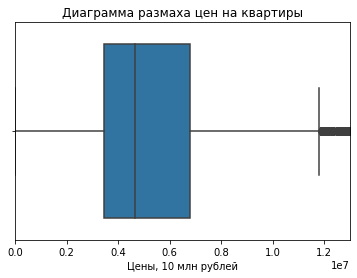

In [388]:
sns.boxplot(df['last_price'])
plt.title('Диаграмма размаха цен на квартиры')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13000000)

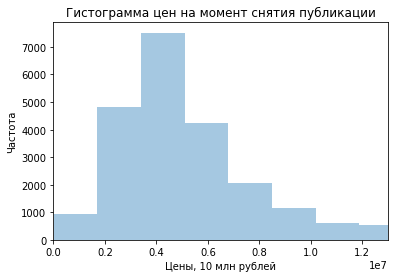

In [389]:
sns.distplot(df['last_price'], kde=False, bins=450)
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

In [390]:
anomalies_ratio('last_price')

'Аномальные значения составляют 8.8%'

In [391]:
det_whiskers('rooms')

[1.0, 6.0]

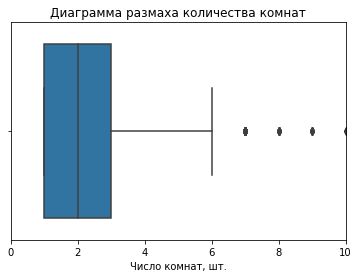

In [392]:
sns.boxplot(df['rooms'])
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 10)

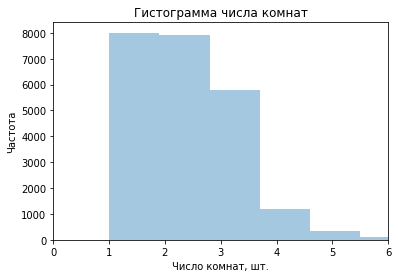

In [393]:
sns.distplot(df['rooms'], kde=False, bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

In [394]:
anomalies_ratio('rooms')

'Аномальные значения составляют 0.4%'

In [395]:
det_whiskers('ceiling_height')

[2.07, 3.24]

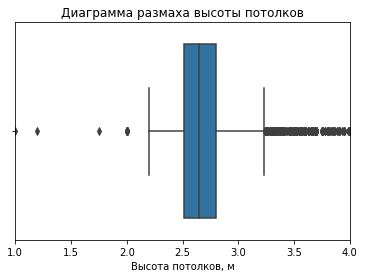

In [396]:
sns.boxplot(df['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)

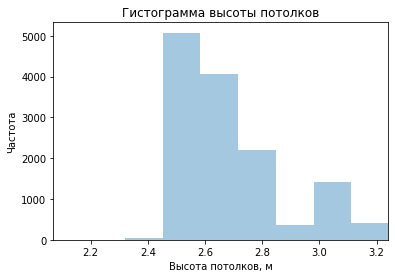

In [397]:
sns.distplot(df['ceiling_height'], kde=False, bins=750)
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

In [398]:
anomalies_ratio('ceiling_height')

'Аномальные значения составляют 3.4%'

In [399]:
det_whiskers('days_exposition')

[1.0, 430.0]

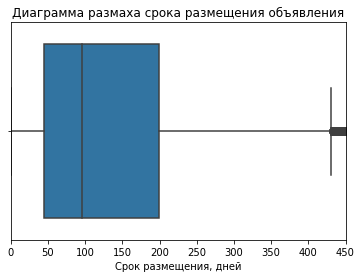

In [400]:
sns.boxplot(df['days_exposition'])
plt.title('Диаграмма размаха срока размещения объявления')
plt.xlabel('Срок размещения, дней')
_ = plt.xlim(0, 450)

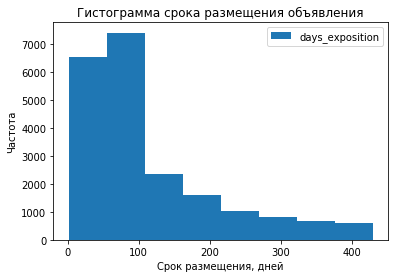

In [401]:
df.plot(y='days_exposition', 
          kind='hist',
          range=(det_whiskers('days_exposition')[0], det_whiskers('days_exposition')[1]), 
          bins=8)
plt.title('Гистограмма срока размещения объявления')
plt.xlabel('Срок размещения, дней')
_ = plt.ylabel('Частота')

In [402]:
#Соберем все аномальные значения в отдельные столбцы
df['too_large_area'] = df['total_area'] > det_whiskers('total_area')[1]
df['too_expensive'] = df['last_price'] > det_whiskers('last_price')[1]
df['too_many_rooms'] = df['rooms'] > det_whiskers('rooms')[1]
df['unusual_ceiling'] = (df['ceiling_height'] > det_whiskers('ceiling_height')[1]) \
                        | (df['ceiling_height'] < det_whiskers('ceiling_height')[0])
df['too_slow'] = df['days_exposition'] > det_whiskers('days_exposition')[1]
df['too_fast'] = df['days_exposition'] < 30

#Составим таблицу с чистыми данными
good_df = df[(df['too_large_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

print('Доля чистых значений составила: {:.1%}'. format(len(good_df) / len(df)))

Доля чистых значений составила: 66.8%


In [403]:
good_df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,15605.000000,1.560500e+04,15605.000000,9411.000000,15605.000000
mean,52.711752,4.758105e+06,1.930855,2.659139,131.298302
std,17.253363,2.166745e+06,0.866299,0.171356,94.293549
min,12.000000,4.300000e+05,1.000000,2.200000,30.000000
25%,39.300000,3.300000e+06,1.000000,2.500000,61.000000
50%,49.400000,4.390000e+06,2.000000,2.600000,96.000000
75%,63.000000,5.900000e+06,3.000000,2.750000,169.000000
max,114.300000,1.180967e+07,6.000000,3.240000,430.000000


### Вывод:

Исследовав данные, мы теперь можем определить параметры средней квартиры выставленной на продажу:
1. двухкомнатная квартира;
2. площадь 52 квадратных метра;
3. потолки 2.65 метра;
4. цена 4,76 млн.;
5. время продажи 95 дней;

Какие аномальные значения были найдены:

1. квартиры с 7 и более комнатами;
2. квартиры с площадями от 150 квадратов (возможно это коттеджи или таунхаусы);
3. низкие потолки до 2 метров и очень большие от 4 метров;
4. огромные цены в 20,30 и больше млн.
5. квартиры размещенные более года назад

Очень долгими продажами можно признать квартиры которые висели больше 12 месяцев - это говорит о завышенной цене или других неприятных факторах, отталкивающих покупателей. Если квартира продавалась за 30 дней и меньше, то это говорит либо об очень заниженной цене при срочной продаже, либо о мошеннических схемах, особенно это касается объявлений снятых через считанные дни.

In [404]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 35 columns):
locality_name           15605 non-null object
total_area              15605 non-null float64
living_area             15605 non-null float64
kitchen_area            15605 non-null float64
ceiling_height          9411 non-null float64
rooms                   15605 non-null int64
balcony                 15605 non-null int64
floor                   15605 non-null int64
floors_total            15605 non-null int64
is_apartment            15605 non-null object
studio                  15605 non-null bool
open_plan               15605 non-null bool
total_images            15605 non-null int64
last_price              15605 non-null int64
first_day_exposition    15605 non-null datetime64[ns]
days_exposition         15605 non-null int64
citycenter_m            11372 non-null float64
airports_m              11413 non-null float64
parks_3km               11413 non-null float64
parks_nearest_

In [405]:
#рассчитаем какие факторы больше всего влияют на стоимость квартиры
corr = good_df[['last_price',\
           'total_area',\
           'rooms',\
           'floor',\
           'citycenter_m',\
           'number_day',\
           'month',\
            'year'    
               ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,floor,citycenter_m,number_day,month,year
last_price,1,0.680489,0.408532,0.169141,-0.324984,-0.0165025,0.00940912,0.0406776
total_area,0.680489,1,0.798657,-0.0187113,-0.0960443,-0.0107685,0.0147161,-0.0184451
rooms,0.408532,0.798657,1,-0.171176,-0.057504,0.00177758,0.00363837,-0.00349438
floor,0.169141,-0.0187113,-0.171176,1,-0.0276529,0.00628911,0.0170552,-0.00832479
citycenter_m,-0.324984,-0.0960443,-0.057504,-0.0276529,1,0.00577231,-0.0187061,0.00480977
number_day,-0.0165025,-0.0107685,0.00177758,0.00628911,0.00577231,1,0.00154647,-0.00390297
month,0.00940912,0.0147161,0.00363837,0.0170552,-0.0187061,0.00154647,1,-0.296624
year,0.0406776,-0.0184451,-0.00349438,-0.00832479,0.00480977,-0.00390297,-0.296624,1


### Вывод:

На цену квартиры сильнее всего влияет общая площадь и количество комнат, что в принципе было ожидаемо, небольшое влияние есть и от расстояния от центра. Этаж влияет значительно слабее, уже прошло то время когда везде покупатели писали: "не первый и последний этаж". День подачи объявления, как оказалось, вообще не влияет на цену, что в принципе логично.

In [406]:
#выберем 10 населенных пункттов с большим количеством объявлений и рассчитаем в них цены за квадратный метр
median_price_meter = good_df.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'median', 'mean'])
median_price_meter.columns = ['count', 'median', 'mean']
median_price_meter.sort_values('count', ascending=False).head(10)

,count,median,mean
locality_name,,,
Санкт-Петербург,9619,102127.660,105605.585063
посёлок Мурино,349,84876.540,85034.916103
посёлок Шушары,334,76439.145,78605.457814
Всеволожск,307,65833.330,67398.749902
Пушкин,254,98482.570,99802.753937
посёлок Парголово,247,91346.150,90053.457490
Колпино,244,74324.320,74889.628484
Гатчина,232,67180.705,68565.285086
деревня Кудрово,203,91666.670,92798.212463


### Вывод:

Было ожидаемо что в Санкт-Петербурге больше всего предложений и средняя цена метра значительно выше всех остальных населенных пунктов. Ну а дешевые квадратные метры стоит искать в Выборге.

In [407]:
#Изучим квартиры в центре Санкт-Петербурга
#выделим центр города
df['citycenter_km'] = round(df['citycenter_m'] / 1000, 0)
df['citycenter_km'] = df['citycenter_km'].astype('int', errors='ignore')
#обновляем чистые данные столбцом с километрами до центра
good_df = df[(df['too_large_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['unusual_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

good_df.loc[(good_df['locality_name'] == 'Санкт-Петербург') & (good_df['citycenter_km'].notna()), 'citycenter_km'].apply(round)
spb = good_df.query('locality_name == "Санкт-Петербург"')
spb_center = spb.pivot_table(index='citycenter_km', values=['price_meter', 'last_price'], aggfunc='median')
spb_center.head()

,last_price,price_meter
citycenter_km,,
0.0,6900000,108163.270
1.0,7750000,108856.435
2.0,7950000,116883.120
3.0,7325000,107783.785
4.0,7200000,110918.055


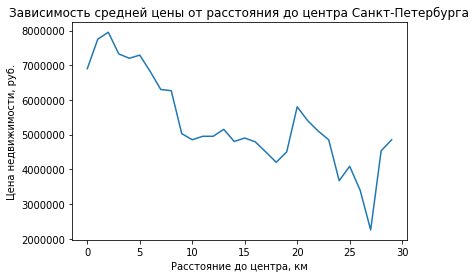

In [408]:
#построим график зависимости цены от расстояние до центра
sns.lineplot(x=spb_center.index, y='last_price', data=spb_center)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

In [409]:
#Как видим цена резко меняется начиная с 8 километра, область с таким радиусом и возьмем за центр города.
spb_center = good_df[(good_df['citycenter_km'] <= 8) & (good_df['locality_name'] == 'Санкт-Петербург')]

In [410]:
#проанализируем центральную территорию и изучим параметры: площадь, цена, число комнат, высота потолков.
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1667.000000,1.667000e+03,1667.000000,1018.000000
mean,62.498836,7.155791e+06,2.215957,2.862171
std,19.910057,2.132521e+06,0.912845,0.223490
min,12.000000,2.400000e+06,1.000000,2.400000
25%,46.200000,5.500000e+06,2.000000,2.700000
50%,60.900000,6.990000e+06,2.000000,2.900000
75%,76.000000,8.700000e+06,3.000000,3.000000
max,114.200000,1.180967e+07,6.000000,3.240000


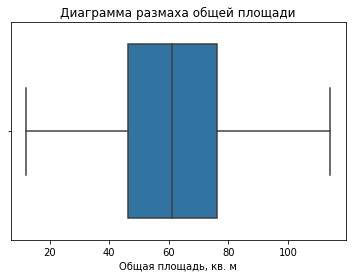

In [411]:
#площадь
sns.boxplot(spb_center['total_area'])
plt.title('Диаграмма размаха общей площади')
plt.xlabel('Общая площадь, кв. м')
plt.show()

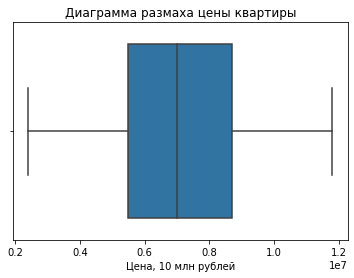

In [412]:
#цена
sns.boxplot(spb_center['last_price'])
plt.title('Диаграмма размаха цены квартиры')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

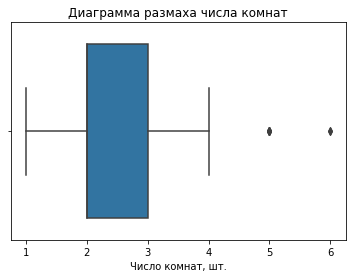

In [413]:
#число комнат
sns.boxplot(spb_center['rooms'])
plt.title('Диаграмма размаха числа комнат')
plt.xlabel('Число комнат, шт.')
plt.show()

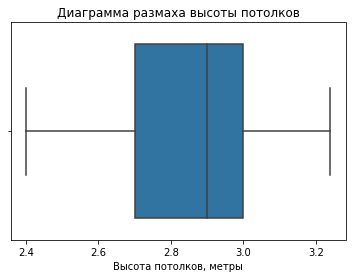

In [414]:
#высота потолков
sns.boxplot(spb_center['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков, метры')
plt.show()

### Вывод:

Теперь мы определили среднюю квартиру выставленную на продажу в центре Санкт-Петербурга. Рассмотрев полученные характеристики, можно сделать вывод: в центре немного выше размеры квартир и цена значительно превышает среднюю по нашим общим данным, а вообще квартиры схожи по своим общим данным.

In [415]:
#выделим факторы, которые влияют на стоимость квартиры в центре "Санкт-Петербурга"
corr = spb_center[['last_price',\
           'rooms',\
           'floor',\
           'citycenter_m',\
           'number_day',\
           'month',\
            'year'    
               ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,rooms,floor,citycenter_m,number_day,month,year
last_price,1,0.438538,0.143371,-0.154488,0.0309186,-0.00455501,0.0789092
rooms,0.438538,1,-0.156442,-0.168014,-0.00565666,0.0299942,-0.0209629
floor,0.143371,-0.156442,1,0.287205,0.0409861,0.0200849,0.00870692
citycenter_m,-0.154488,-0.168014,0.287205,1,0.0406809,-0.0159575,0.0429534
number_day,0.0309186,-0.00565666,0.0409861,0.0406809,1,0.057372,0.00623161
month,-0.00455501,0.0299942,0.0200849,-0.0159575,0.057372,1,-0.289235
year,0.0789092,-0.0209629,0.00870692,0.0429534,0.00623161,-0.289235,1


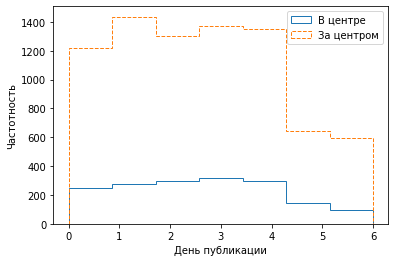

In [416]:
#посмотрим как менялась активность продаж квартир в зависимости от временных данных и зоны расположения
ax = spb_center.plot(kind='hist', y='number_day', histtype='step', bins=7, label='В центре')

good_df[(good_df['citycenter_km'] > 8) & (good_df['locality_name'] == 'Санкт-Петербург')]\
.plot(kind='hist', y='number_day', histtype='step', bins=7, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('День публикации')
plt.ylabel('Частотность')

plt.show()


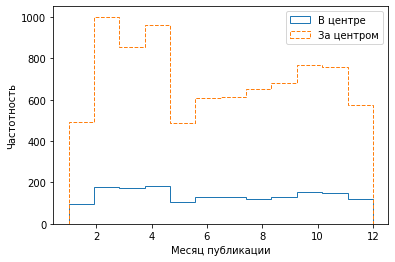

In [417]:
ax = spb_center.plot(kind='hist', y='month', histtype='step', bins=12, label='В центре')
good_df[(good_df['citycenter_km'] > 6) & (good_df['locality_name'] == 'Санкт-Петербург')]\
.plot(kind='hist', y='month', histtype='step', bins=12, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('Месяц публикации')
plt.ylabel('Частотность')
plt.show()

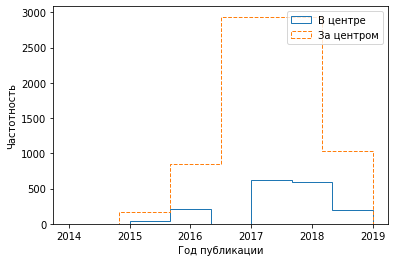

In [418]:
ax = spb_center.plot(kind='hist', y='year', histtype='step', bins=6, label='В центре')
good_df[(good_df['citycenter_km'] > 8) & (good_df['locality_name'] == 'Санкт-Петербург')]\
.plot(kind='hist', y='year', histtype='step', bins=6, ax=ax, label='За центром', linestyle='dashed')
plt.xlabel('Год публикации')
plt.ylabel('Частотность')
plt.show()

### Вывод

Можно отметить довольно сильную зависимость стоимости квартир от количества комнат, влияет также и этаж, но примерно с такой же силой как и в общем по таблице данных. Также ясно видна зависимость от расстояния до центра, с удалением соответственно будет падать и цена.

Дополнено: Наибольшую активность продавцы проявляют в первые пять дней недели, а выходные затишье. Также удалось выяснить, что больше всего объявлений появляется весной и осенью, однако в центре квартиры продают примерно с одинаковой активностью в течение всех месяцев года. Основная масса публикации квартир пришлась в период с середины 2016 по середину 2018 годов.

### <a href='section7'>5. Общий вывод</a>

Мы провели ряд исследований, и уже можем точно сказать, какие параметры влияют на определение рыночной стоимости квартиры.

1. общая площадь (50-60 кв.м. это золотая середина для квартир)
2. число комнат (2-комнатные квартиры самые популярные)
3. этаж квартиры(люди все также стараются избегать первый и последний этаж, хотя эта тенденция постепенно меняется)
4. расстояние от центра города (чем ближе к центру тем увеличивается цена, да и спрос на такие квартиры всегда повышенный)

Что касается выявленных аномалий:программистам надо разработать алгоритм, не позволяющий вводить нереальные данные, это особенно касается высоты потолков и количества комнат в квартире. Также необходимо отдельно проанализировать, что приводит к задержки на годы продажи части квартир, возможно разработать какие-то подсказки при заполнении, что поможет продавцу качественне заполнить данные и указать цену более реальную на сегодняшний день. Квартиры, которые продавались за пару дней, стоит проверить, возможно это мошеннические действия, либо продавцы передумали продавать их, тогда узнать по какой причине.